In [ ]:
!pip install numpy
!pip install matplotlib
!pip install pandas

In [100]:
from __future__ import division
from collections import Counter
from functools import partial

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [101]:
def degrau(x):
    return 1 if x >= 0 else 0


def saida_perceptron(pesos, entradas):
    y = np.dot(pesos, entradas)
    return degrau(y)


def ajustes(sinapses, entradas, saida):
    taxa_aprendizagem = 0.04

    saida_parcial = saida_perceptron(sinapses, entradas)

    for j in range(3):
        sinapses[j] = (
            sinapses[j] + taxa_aprendizagem * (saida[0] - saida_parcial) * entradas[j]
        )

    return sinapses, saida_parcial


def teste_generalizacao(sinapses, entradas):
    return saida_perceptron(sinapses, entradas)


In [104]:
# Carrega o conjunto de dados Iris em um objeto DataFrame
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head(100)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


In [107]:
# Extrai a coluna de indice 4 das primeiras 100 entradas
# Correspondendo a 50 entradas contendo "Iris-setosa" e 50 entradas com "Iris-versicolor"
y = df.iloc[0:100, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [108]:
# Converte os nomes das espécies em 2 classificações representadas por 0 e 1:
# 0: "Iris-setosa"
# 1: "Iris-versicolor"
y = np.where(y == 'Iris-setosa', 0, 1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [109]:
# Extrai os atributos "comprimento da sépala" (coluna 0 do DataFrame) e "comprimento da pétala" (coluna 2)
X = df.iloc[0:100, [0, 2]].values
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [110]:
# Normaliza o valor de cada atributo para um valor entre 0 e 1
X_normalized = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X = X_normalized

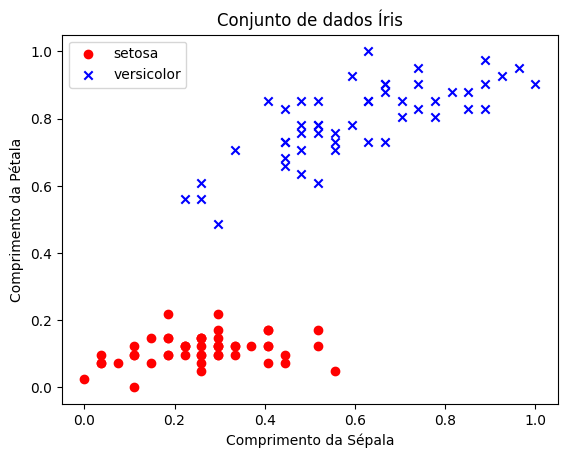

In [111]:
# Visualização das classificações em relação aos atributos
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.title('Conjunto de dados Íris')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Comprimento da Pétala')
plt.legend(loc='upper left')
plt.show()

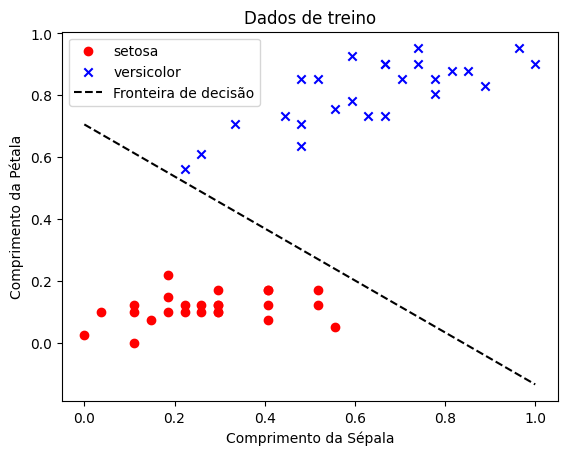

In [112]:
# Visualização das classificações em relação aos atributos
plt.scatter(X[:25, 0], X[:25, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:75, 0], X[50:75, 1], color='blue', marker='x', label='versicolor')

x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

w0, w1, w2 = -0.33, 0.39333333, 0.46780488
# Equação da reta, em que x e y representam o par de atributos
# w0 + w1*x + w2*y = 0 => y = -(w1/w2)*x - (w0/w2)
y_vals = -(w1 / w2) * x_vals - (w0 / w2)

plt.plot(x_vals, y_vals, 'k--', label='Fronteira de decisão')
plt.title('Dados de treino')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Comprimento da Pétala')
plt.legend(loc='upper left')
plt.show()

In [113]:
# Insere o bias como primeiro elemento de cada linha da matriz contendo o par de atributos
bias = 1.0
x = np.insert(X, 0, bias, axis=1)
x

array([[1.        , 0.2962963 , 0.09756098],
       [1.        , 0.22222222, 0.09756098],
       [1.        , 0.14814815, 0.07317073],
       [1.        , 0.11111111, 0.12195122],
       [1.        , 0.25925926, 0.09756098],
       [1.        , 0.40740741, 0.17073171],
       [1.        , 0.11111111, 0.09756098],
       [1.        , 0.25925926, 0.12195122],
       [1.        , 0.03703704, 0.09756098],
       [1.        , 0.22222222, 0.12195122],
       [1.        , 0.40740741, 0.12195122],
       [1.        , 0.18518519, 0.14634146],
       [1.        , 0.18518519, 0.09756098],
       [1.        , 0.        , 0.02439024],
       [1.        , 0.55555556, 0.04878049],
       [1.        , 0.51851852, 0.12195122],
       [1.        , 0.40740741, 0.07317073],
       [1.        , 0.2962963 , 0.09756098],
       [1.        , 0.51851852, 0.17073171],
       [1.        , 0.2962963 , 0.12195122],
       [1.        , 0.40740741, 0.17073171],
       [1.        , 0.2962963 , 0.12195122],
       [1.

In [114]:
# Separa o conjunto de dados em duas matrizes, uma pra cada classificação
x_setosa = x[0:50]
x_versicolor = x[50:100]
print("Iris-setosa")
print(x_setosa)
print("-----------")
print("Iris-versicolor")
print(x_versicolor)

Iris-setosa
[[1.         0.2962963  0.09756098]
 [1.         0.22222222 0.09756098]
 [1.         0.14814815 0.07317073]
 [1.         0.11111111 0.12195122]
 [1.         0.25925926 0.09756098]
 [1.         0.40740741 0.17073171]
 [1.         0.11111111 0.09756098]
 [1.         0.25925926 0.12195122]
 [1.         0.03703704 0.09756098]
 [1.         0.22222222 0.12195122]
 [1.         0.40740741 0.12195122]
 [1.         0.18518519 0.14634146]
 [1.         0.18518519 0.09756098]
 [1.         0.         0.02439024]
 [1.         0.55555556 0.04878049]
 [1.         0.51851852 0.12195122]
 [1.         0.40740741 0.07317073]
 [1.         0.2962963  0.09756098]
 [1.         0.51851852 0.17073171]
 [1.         0.2962963  0.12195122]
 [1.         0.40740741 0.17073171]
 [1.         0.2962963  0.12195122]
 [1.         0.11111111 0.        ]
 [1.         0.2962963  0.17073171]
 [1.         0.18518519 0.2195122 ]
 [1.         0.25925926 0.14634146]
 [1.         0.25925926 0.14634146]
 [1.         0.3

In [115]:
# Inicializa os pesos
neuronio = [-0.05, 0.5, 0.5]

In [116]:
y_setosa = [0]
y_versicolor = [1]

ciclos = 5
for n in range(ciclos):
    # Treina com 25 amostras de Iris-setosa
    for i, x in enumerate(x_setosa[0:25]):
        neuronio, saida_0 = ajustes(neuronio, x, y_setosa)
        print(x, np.array(neuronio), "saida_0 =", saida_0)
        
    # Treina com 25 amostras de Iris-versicolor
    for i, x in enumerate(x_versicolor[0:25]):
        neuronio, saida_1 = ajustes(neuronio, x, y_versicolor)
        print(x, np.array(neuronio), "saida_1 =", saida_1)

    print("número de ciclos = ", n+1)
    print()


[1.         0.2962963  0.09756098] [-0.09        0.48814815  0.49609756] saida_0 = 1
[1.         0.22222222 0.09756098] [-0.13        0.47925926  0.49219512] saida_0 = 1
[1.         0.14814815 0.07317073] [-0.13        0.47925926  0.49219512] saida_0 = 0
[1.         0.11111111 0.12195122] [-0.13        0.47925926  0.49219512] saida_0 = 0
[1.         0.25925926 0.09756098] [-0.17        0.46888889  0.48829268] saida_0 = 1
[1.         0.40740741 0.17073171] [-0.21        0.45259259  0.48146341] saida_0 = 1
[1.         0.11111111 0.09756098] [-0.21        0.45259259  0.48146341] saida_0 = 0
[1.         0.25925926 0.12195122] [-0.21        0.45259259  0.48146341] saida_0 = 0
[1.         0.03703704 0.09756098] [-0.21        0.45259259  0.48146341] saida_0 = 0
[1.         0.22222222 0.12195122] [-0.21        0.45259259  0.48146341] saida_0 = 0
[1.         0.40740741 0.12195122] [-0.25        0.4362963   0.47658537] saida_0 = 1
[1.         0.18518519 0.14634146] [-0.25        0.4362963   0.47

In [117]:
# Teste de generalização
print("neuronio =", np.array(neuronio))

# 25 amostras de setosa que ficaram fora do treinamento
for i, x in enumerate(x_setosa[25:50]):
    saida_0 = teste_generalizacao(neuronio, x)
    print("x =", x, "\t=>\tsaida_0 =", saida_0)

# 25 amostras de versicolor que ficaram fora do treinamento
for i, x in enumerate(x_versicolor[25:50]):
    saida_1 = teste_generalizacao(neuronio, x)
    print("x =", x, "\t=>\tsaida_1 =", saida_1)

neuronio = [-0.33        0.39333333  0.46780488]
x = [1.         0.25925926 0.14634146] 	=>	saida_0 = 0
x = [1.         0.25925926 0.14634146] 	=>	saida_0 = 0
x = [1.         0.33333333 0.12195122] 	=>	saida_0 = 0
x = [1.         0.33333333 0.09756098] 	=>	saida_0 = 0
x = [1.         0.14814815 0.14634146] 	=>	saida_0 = 0
x = [1.         0.18518519 0.14634146] 	=>	saida_0 = 0
x = [1.         0.40740741 0.12195122] 	=>	saida_0 = 0
x = [1.         0.33333333 0.12195122] 	=>	saida_0 = 0
x = [1.         0.44444444 0.09756098] 	=>	saida_0 = 0
x = [1.         0.22222222 0.12195122] 	=>	saida_0 = 0
x = [1.         0.25925926 0.04878049] 	=>	saida_0 = 0
x = [1.         0.44444444 0.07317073] 	=>	saida_0 = 0
x = [1.         0.22222222 0.12195122] 	=>	saida_0 = 0
x = [1.         0.03703704 0.07317073] 	=>	saida_0 = 0
x = [1.         0.2962963  0.12195122] 	=>	saida_0 = 0
x = [1.         0.25925926 0.07317073] 	=>	saida_0 = 0
x = [1.         0.07407407 0.07317073] 	=>	saida_0 = 0
x = [1.         

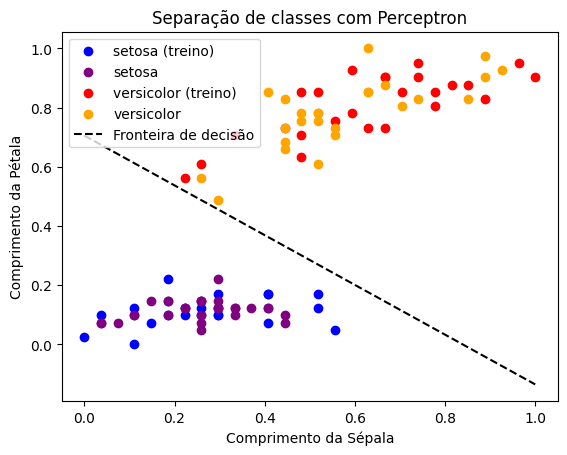

In [118]:
# Separa as classes
X_setosa = X[:50]
X_versicolor = X[50:]

# Exibe cada classe em cores diferentes
plt.scatter(X_setosa[:25, 0], X_setosa[:25, 1], color='blue', label='setosa (treino)')
plt.scatter(X_setosa[25:, 0], X_setosa[25:, 1], color='purple', label='setosa')
plt.scatter(X_versicolor[:25, 0], X_versicolor[:25, 1], color='red', label='versicolor (treino)')
plt.scatter(X_versicolor[25:, 0], X_versicolor[25:, 1], color='orange', label='versicolor')

# Define a reta de separação entre as classes a partir dos pesos pós treinamento
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
w0, w1, w2 = neuronio
# Equação da reta, em que x e y representam o par de atributos
# w0 + w1*x + w2*y = 0 => y = -(w1/w2)*x - (w0/w2)
y_vals = -(w1 / w2) * x_vals - (w0 / w2)

plt.plot(x_vals, y_vals, 'k--', label='Fronteira de decisão')

plt.xlabel('Comprimento da Sépala')
plt.ylabel('Comprimento da Pétala')
plt.legend(loc='upper left')
plt.title('Separação de classes com Perceptron')
plt.show()


In [94]:
# Referências:
# https://www.bogotobogo.com/python/scikit-learn/Perceptron_Model_with_Iris_DataSet.php